In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,7]
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams ['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['font.size'] = 19
matplotlib.rcParams['font.family']= 'DejaVu Serif'
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams['errorbar.capsize'] = 3
matplotlib.rcParams['figure.facecolor'] = (1,1,1)

In [2]:
signals_mc_spec = [ # name, weight, energy, ewidth, radius, rwidth
    ('A',10,3,1,3,1),
    ('B',10,3,1,7,1),
    ('C',10,7,1,3,1),
    ('D',10,7,1,7,1)
]

poisson_means = [200,100,100,50]

def gen_fake(filename,energy,ewidth,radius,rwidth,num=10000):
    e = np.random.normal(energy,ewidth,num)
    r = np.random.normal(radius,rwidth,num)
    data = np.asarray([e,r]).T
    if filename:
        np.save(filename,data)
    else:
        return data
    
for name, weight, energy, ewidth, radius, rwidth in signals_mc_spec:
    for i in range(weight):
        gen_fake('data/%s_%i.npy'%(name,i),energy, ewidth, radius, rwidth)

for i in range(250):
    means = np.random.poisson(poisson_means)
    data = []
    for j, (name, weight, energy, ewidth, radius, rwidth) in enumerate(signals_mc_spec):
        s_data = gen_fake(None, energy, ewidth, radius, rwidth, num=means[j])
        data.append(s_data)
    data = np.concatenate(data)
    np.save('data/raw_data_%i.npy'%i,data)

In [3]:
from kdfit.calculate import System
from kdfit.analysis import Analysis
from kdfit.data import NPYData

In [4]:
a = Analysis()
obs = a.add_observables('Scint_Phase')
e_scale,e_shift,e_res = obs.add_dimension('Energy',0,10)
r_scale,r_shift,r_res = obs.add_dimension('Radius',0,10)
A_sig = obs.add_signal('A_pdf')
B_sig = obs.add_signal('B_pdf')
C_sig = obs.add_signal('C_pdf')
D_sig = obs.add_signal('D_pdf')

In [5]:
mc_files = dict(Scint_Phase=dict(A_pdf=NPYData('A_mc_loader',glob('data/A_*.npy'),indexes=[0,1]),
                                B_pdf=NPYData('B_mc_loader',glob('data/B_*.npy'),indexes=[0,1]),
                                C_pdf=NPYData('C_mc_loader',glob('data/C_*.npy'),indexes=[0,1]),
                                D_pdf=NPYData('D_mc_loader',glob('data/D_*.npy'),indexes=[0,1])))
a.load_mc(mc_files)

In [6]:
a.load_data(dict(Scint_Phase=NPYData('data_loader',['data/raw_data_0.npy'],indexes=[0,1])))

In [7]:
A_sig.nev_param.value = poisson_means[0]
A_sig.nev_param.fixed = False
B_sig.nev_param.value = poisson_means[1]
B_sig.nev_param.fixed = False
C_sig.nev_param.value = poisson_means[2]
C_sig.nev_param.fixed = False
D_sig.nev_param.value = poisson_means[3]
D_sig.nev_param.fixed = False
a.create_likelihood(verbose=True)

Ouput Values: [Total_Likelihood]
Scint_Phase_UnbinnedLikelihood => Total_Likelihood
A_pdf_nev => Scint_Phase_UnbinnedLikelihood
B_pdf_nev => Scint_Phase_UnbinnedLikelihood
C_pdf_nev => Scint_Phase_UnbinnedLikelihood
D_pdf_nev => Scint_Phase_UnbinnedLikelihood
A_pdf_eval => Scint_Phase_UnbinnedLikelihood
B_pdf_eval => Scint_Phase_UnbinnedLikelihood
C_pdf_eval => Scint_Phase_UnbinnedLikelihood
D_pdf_eval => Scint_Phase_UnbinnedLikelihood
A_pdf => A_pdf_eval
Scint_Phase => A_pdf_eval
B_pdf => B_pdf_eval
Scint_Phase => B_pdf_eval
C_pdf => C_pdf_eval
Scint_Phase => C_pdf_eval
D_pdf => D_pdf_eval
Scint_Phase => D_pdf_eval
A_pdf_mc => A_pdf
Energy_scale => A_pdf
Energy_shift => A_pdf
Energy_resolution => A_pdf
Radius_scale => A_pdf
Radius_shift => A_pdf
Radius_resolution => A_pdf
Scint_Phase_data => Scint_Phase
B_pdf_mc => B_pdf
Energy_scale => B_pdf
Energy_shift => B_pdf
Energy_resolution => B_pdf
Radius_scale => B_pdf
Radius_shift => B_pdf
Radius_resolution => B_pdf
C_pdf_mc => C_pdf
Energy

In [8]:
%prun a(verbose=True) #calculate the likelihood at central values to load data & mc 

Calculating A_mc_loader
Calculating data_loader
Calculating B_mc_loader
Calculating C_mc_loader
Calculating D_mc_loader
Calculating A_pdf_mc
Calculating Scint_Phase_data
Calculating B_pdf_mc
Calculating C_pdf_mc
Calculating D_pdf_mc
Calculating A_pdf
Loading: data/A_2.npy, data/A_3.npy, data/A_7.npy, data/A_6.npy, data/A_8.npy, data/A_0.npy, data/A_1.npy, data/A_9.npy, data/A_5.npy, data/A_4.npy
Calculating Scint_Phase
Loading: data/raw_data_0.npy
Calculating B_pdf
Loading: data/B_4.npy, data/B_5.npy, data/B_8.npy, data/B_1.npy, data/B_0.npy, data/B_9.npy, data/B_6.npy, data/B_3.npy, data/B_2.npy, data/B_7.npy
Calculating C_pdf
Loading: data/C_0.npy, data/C_1.npy, data/C_5.npy, data/C_8.npy, data/C_3.npy, data/C_9.npy, data/C_2.npy, data/C_6.npy, data/C_7.npy, data/C_4.npy
Calculating D_pdf
Loading: data/D_8.npy, data/D_0.npy, data/D_2.npy, data/D_6.npy, data/D_3.npy, data/D_9.npy, data/D_7.npy, data/D_1.npy, data/D_4.npy, data/D_5.npy
Calculating A_pdf_eval
Calculating B_pdf_eval
Calc

rough int 1.0030499833794018


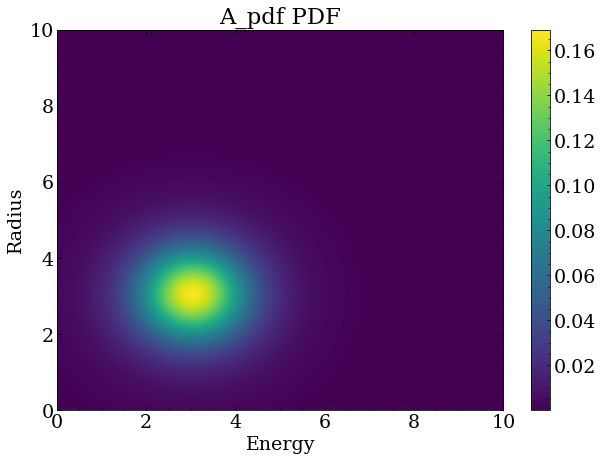

rough int 1.0030725852286464


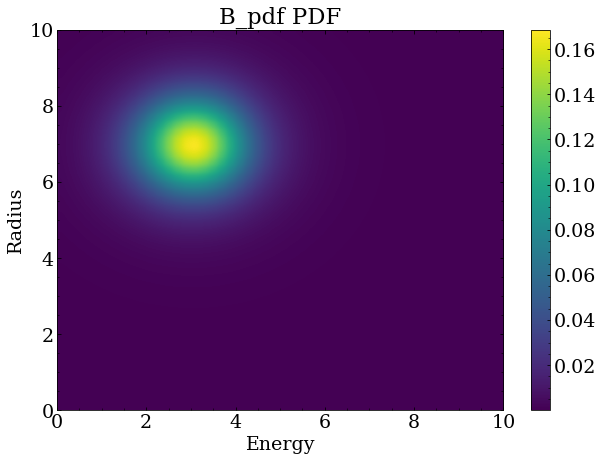

rough int 1.003112546844912


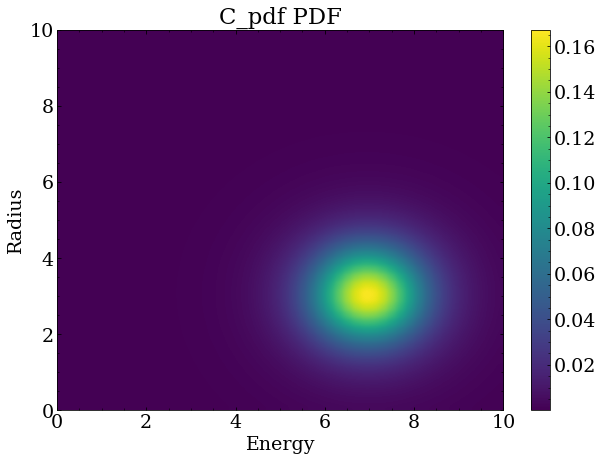

rough int 1.0030243301995636


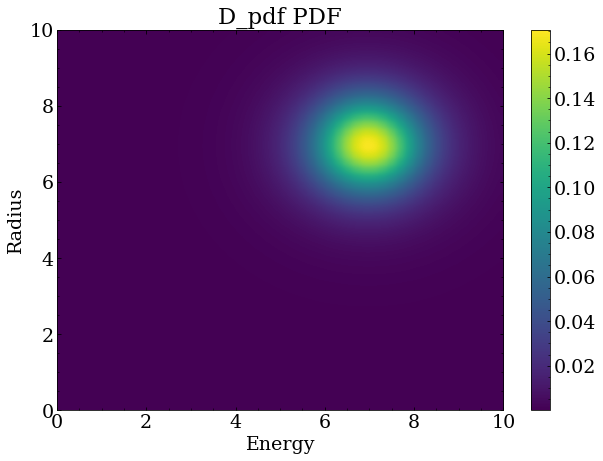

In [9]:
for s in obs.signals.values():
    Xv,Yv = np.linspace(obs.lows[0],obs.highs[0],50),np.linspace(obs.lows[1],obs.highs[1],50)
    X,Y = np.meshgrid(Xv,Yv)
    x_kj = list(zip(X.flatten(),Y.flatten()))
    Z = s.eval_pdf_multi(x_kj)
    print('rough int',np.sum(Z)*(Xv[1]-Xv[0])*(Yv[1]-Yv[0]))
    Z = np.asarray(Z).reshape(X.shape)
    plt.imshow(Z,extent=[np.min(Xv),np.max(Xv),np.max(Yv),np.min(Yv)],aspect='auto',interpolation='gaussian')
    plt.colorbar()
    #plt.scatter(*(s.t_ij.T if np == cp else s.t_ij.T.get()),c='r',marker='x')
    plt.xlim(obs.lows[0],obs.highs[0])
    plt.ylim(obs.lows[1],obs.highs[1])
    plt.xlabel(obs.dimensions[0])
    plt.ylabel(obs.dimensions[1])
    plt.title('%s PDF'%s.name)
    plt.show()
    plt.close()

In [10]:
def gauss(x,m,s):
    return 1/np.sqrt(2*np.pi)/s*np.exp(-np.square((x-m)/s)/2)
from scipy.special import erf
def analytic_norm(energy,ewidth,radius,rwidth):
    a = obs.lows
    b = obs.highs
    m = np.asarray([energy,radius])
    s = np.asarray([ewidth,rwidth])
    d = 2
    return np.prod( erf((b-m)/s/np.sqrt(2)) - erf((a-m)/s/np.sqrt(2))  )/(2**d)
def analytic_pdf(x_kj,energy,ewidth,radius,rwidth):
    return gauss(x_kj[:,0],energy,ewidth)*gauss(x_kj[:,1],radius,rwidth)/analytic_norm(energy,ewidth,radius,rwidth)

rough int 0.002236168389821793


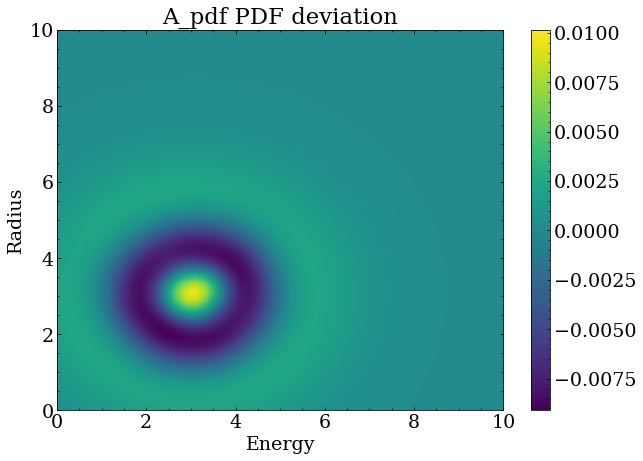

rough int 0.0022587702390662345


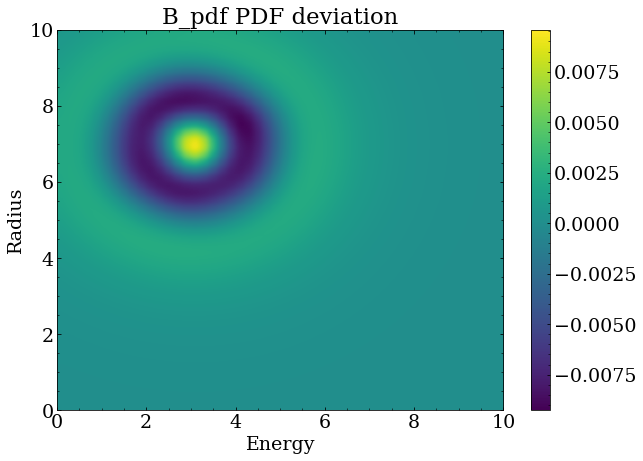

rough int 0.002298731855331938


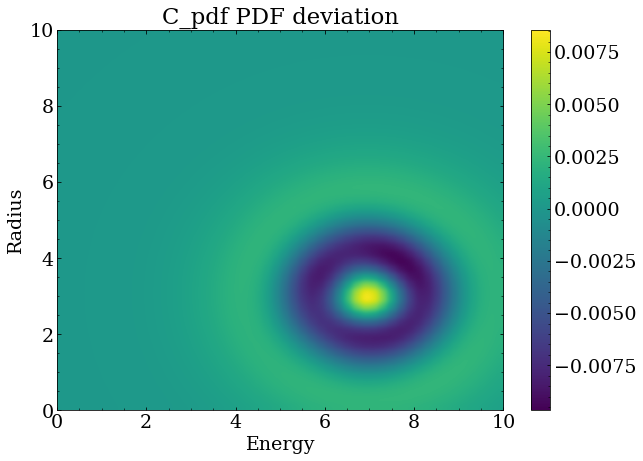

rough int 0.0022105152099837506


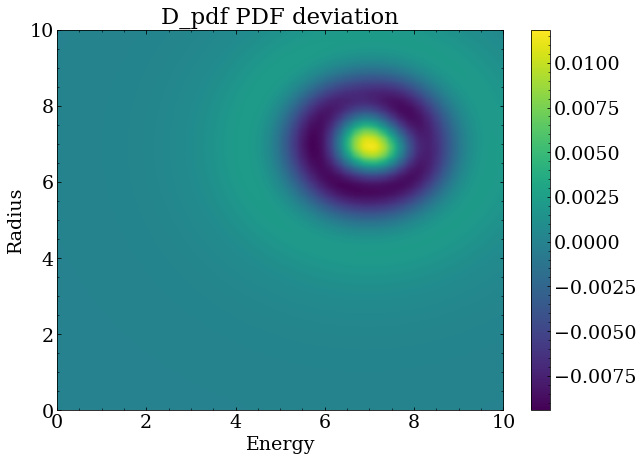

In [11]:
#The structure in the deviations is utterly bizarre to me
for j,s in enumerate(obs.signals.values()):
    name, weight, energy, ewidth, radius, rwidth = signals_mc_spec[j]
    Xv,Yv = np.linspace(obs.lows[0],obs.highs[0],50),np.linspace(obs.lows[1],obs.highs[1],50)
    X,Y = np.meshgrid(Xv,Yv)
    x_kj = np.asarray(list(zip(X.flatten(),Y.flatten())))
    Z = s.eval_pdf_multi(x_kj)
    analytic_Z = analytic_pdf(x_kj,energy,ewidth,radius,rwidth)
    Z = Z - analytic_Z
    print('rough int',np.sum(Z)*(Xv[1]-Xv[0])*(Yv[1]-Yv[0]))
    Z = np.asarray(Z).reshape(X.shape)
    plt.imshow(Z,extent=[np.min(Xv),np.max(Xv),np.max(Yv),np.min(Yv)],aspect='auto',interpolation='gaussian')
    plt.colorbar()
    #plt.scatter(*(s.t_ij.T if np == cp else s.t_ij.T.get()),c='r',marker='x')
    plt.xlim(obs.lows[0],obs.highs[0])
    plt.ylim(obs.lows[1],obs.highs[1])
    plt.xlabel(obs.dimensions[0])
    plt.ylabel(obs.dimensions[1])
    plt.title('%s PDF deviation'%s.name)
    plt.show()
    plt.close()

rough int 1.0030660586515876


Text(0, 0.5, 'Radius')

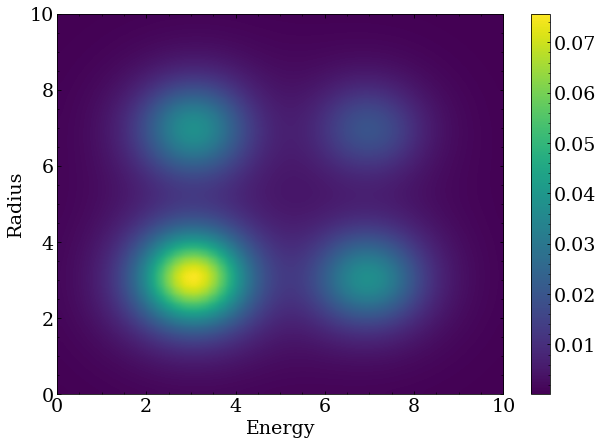

In [12]:
Xv,Yv = np.linspace(obs.lows[0],obs.highs[0],50),np.linspace(obs.lows[1],obs.highs[1],50)
X,Y = np.meshgrid(Xv,Yv)
x_kj = list(zip(X.flatten(),Y.flatten()))
Z = obs.eval_pdf_multi(x_kj)
print('rough int',np.sum(Z)*(Xv[1]-Xv[0])*(Yv[1]-Yv[0]))
Z = np.asarray(Z).reshape(X.shape)
plt.imshow(Z,extent=[np.min(Xv),np.max(Xv),np.max(Yv),np.min(Yv)],aspect='auto',interpolation='gaussian')
plt.colorbar()    
#plt.scatter(*obs.x_ij.T,c='r',marker='x')
plt.xlim(obs.lows[0],obs.highs[0])
plt.ylim(obs.lows[1],obs.highs[1])
plt.xlabel(obs.dimensions[0])
plt.ylabel(obs.dimensions[1])

In [13]:
margs = dict(method='Nelder-Mead',options=dict(fatol=0.001,xatol=0.1))

In [14]:
%prun m = a.minimize(**margs)
print(m)

  final_simplex: (array([[174.74330051, 100.40670817, 102.84040184,  39.98316334],
       [174.77344909, 100.43113982, 102.87398584,  39.99504282],
       [174.77245895, 100.32310018, 102.84430632,  39.974343  ],
       [174.77044929, 100.43903231, 102.892495  ,  39.93479554],
       [174.70379917, 100.39439439, 102.90525096,  39.94197676]]), array([-430.5508272 , -430.55082032, -430.55081605, -430.55081202,
       -430.55081128]))
           fun: -430.5508271995975
       message: 'Optimization terminated successfully.'
          nfev: 101
           nit: 57
        params: {A_pdf_nev: 174.74330050777064, B_pdf_nev: 100.40670817354078, C_pdf_nev: 102.840401838324, D_pdf_nev: 39.98316334154807}
        status: 0
       success: True
             x: array([174.74330051, 100.40670817, 102.84040184,  39.98316334])


Floated Parameters: [B_pdf_nev, C_pdf_nev, D_pdf_nev]
Fixed Parameters: [A_pdf_nev, Energy_scale, Energy_shift, Energy_resolution, Radius_scale, Radius_shift, Radius_resolution]


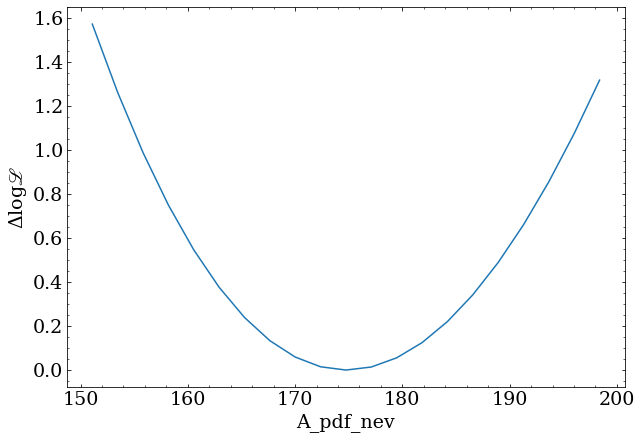

Floated Parameters: [A_pdf_nev, C_pdf_nev, D_pdf_nev]
Fixed Parameters: [B_pdf_nev, Energy_scale, Energy_shift, Energy_resolution, Radius_scale, Radius_shift, Radius_resolution]


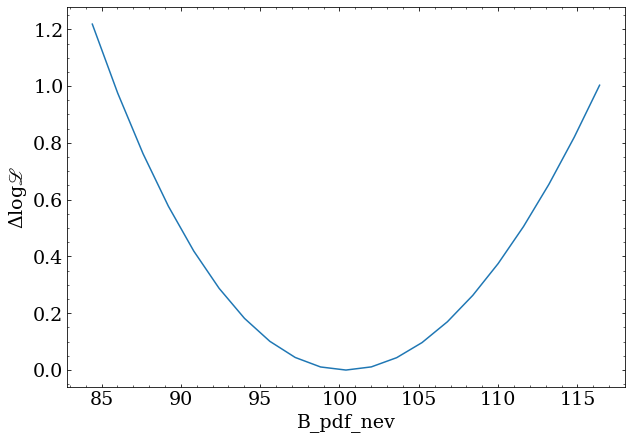

Floated Parameters: [A_pdf_nev, B_pdf_nev, D_pdf_nev]
Fixed Parameters: [C_pdf_nev, Energy_scale, Energy_shift, Energy_resolution, Radius_scale, Radius_shift, Radius_resolution]


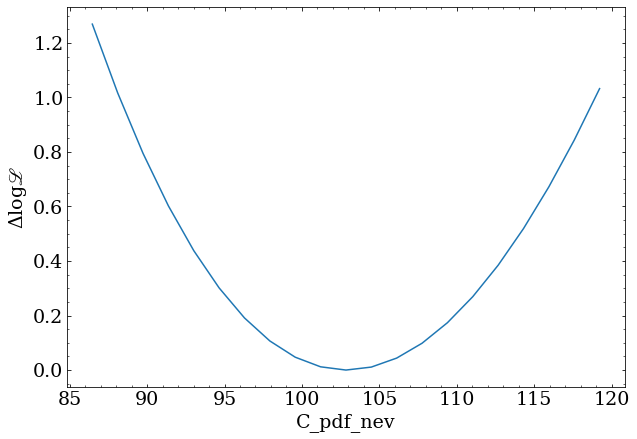

Floated Parameters: [A_pdf_nev, B_pdf_nev, C_pdf_nev]
Fixed Parameters: [D_pdf_nev, Energy_scale, Energy_shift, Energy_resolution, Radius_scale, Radius_shift, Radius_resolution]


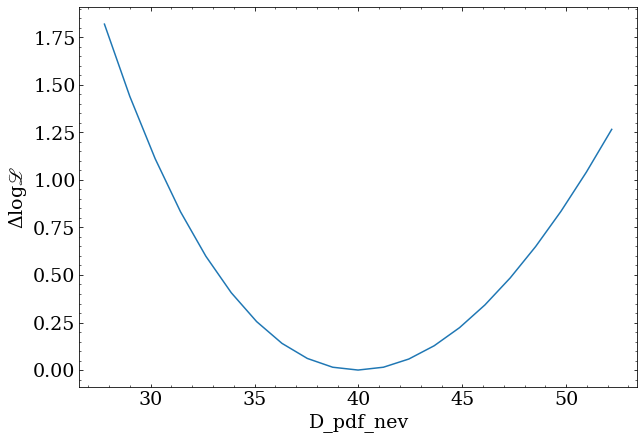

In [15]:
for _p,_v in m.params.items():
    _p.value = _v
    _p.fixed = False
for p,v in m.params.items():
    p.fixed = True
    a.update_likelihood(verbose=True)
    for step in np.logspace(-2,5,100):
        p.value = v*(1-step)
        if a() - m.fun < 1:
            continue
        p.value = v*(1+step)
        if a() - m.fun < 1:
            continue
        break
    X = np.linspace(v*(1-step),v*(1+step),21)
    Y = []
    for x in X:
        p.value = x
        nll = a() - m.fun
        Y.append(nll)
    p.fixed = False
    p.value = v
    plt.plot(X,Y)
    plt.xlabel(p.name)
    plt.ylabel(r'$\Delta$log$\scrL$')
    plt.show()
    plt.close()

In [16]:
%prun a.confidence_intervals(m,method='scan')
print(m)

  final_simplex: (array([[174.74330051, 100.40670817, 102.84040184,  39.98316334],
       [174.77344909, 100.43113982, 102.87398584,  39.99504282],
       [174.77245895, 100.32310018, 102.84430632,  39.974343  ],
       [174.77044929, 100.43903231, 102.892495  ,  39.93479554],
       [174.70379917, 100.39439439, 102.90525096,  39.94197676]]), array([-430.5508272 , -430.55082032, -430.55081605, -430.55081202,
       -430.55081128]))
           fun: -430.5508271995975
         lower: {A_pdf_nev: 13.590018409602521, B_pdf_nev: 10.446276448178196, C_pdf_nev: 10.475566607789034, D_pdf_nev: 6.73189451932172}
       message: 'Optimization terminated successfully.'
          nfev: 101
           nit: 57
        params: {A_pdf_nev: 174.74330050777064, B_pdf_nev: 100.40670817354078, C_pdf_nev: 102.840401838324, D_pdf_nev: 39.98316334154807}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.357976441093513, B_pdf_nev: 11.129764419453863, C_pdf_nev: 11.24493632546465, D_pdf_nev

In [17]:
minima = []
for i in range(250):
    a.load_data(dict(Scint_Phase=NPYData('data_loader',['data/raw_data_%i.npy'%i],indexes=[0,1])))
    a.create_likelihood()
    m = a.minimize(**margs)
    m = a.confidence_intervals(m,method='scan')
    minima.append(m)
    print(m)

Loading: data/raw_data_0.npy
 final_simplex: (array([[174.74330051, 100.40670817, 102.84040184,  39.98316334],
       [174.77352683, 100.35733099, 102.91563609,  39.98436958],
       [174.77529291, 100.40451597, 102.90267362,  40.00073611],
       [174.74570283, 100.36309633, 102.83985873,  40.02031326],
       [174.83319714, 100.33933319, 102.85890191,  40.01265666]]), array([-430.5508272 , -430.55082029, -430.5508186 , -430.55080446,
       -430.5508025 ]))
           fun: -430.5508271995975
         lower: {A_pdf_nev: 13.590018409602521, B_pdf_nev: 10.446276448178196, C_pdf_nev: 10.475566607789034, D_pdf_nev: 6.73189451932172}
       message: 'Optimization terminated successfully.'
          nfev: 73
           nit: 44
        params: {A_pdf_nev: 174.74330050777064, B_pdf_nev: 100.40670817354078, C_pdf_nev: 102.840401838324, D_pdf_nev: 39.98316334154807}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.357976441093513, B_pdf_nev: 11.129764419453863, C_pdf_nev: 1

 final_simplex: (array([[180.21086612, 117.62487954,  99.83956502,  34.35809249],
       [180.13053468, 117.58354435,  99.85453976,  34.38956461],
       [180.20288362, 117.64188608,  99.85846298,  34.37879537],
       [180.19321692, 117.58627107,  99.80595241,  34.379665  ],
       [180.16333238, 117.63704443,  99.78915909,  34.37127442]]), array([-459.71761521, -459.71761448, -459.71761401, -459.71760939,
       -459.71759962]))
           fun: -459.7176152117595
         lower: {A_pdf_nev: 13.794856645668602, B_pdf_nev: 11.156593880336686, C_pdf_nev: 10.306738841618753, D_pdf_nev: 6.262898686202025}
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 78
        params: {A_pdf_nev: 180.21086611719147, B_pdf_nev: 117.62487954138301, C_pdf_nev: 99.83956501757282, D_pdf_nev: 34.358092493126875}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.408319639935854, B_pdf_nev: 11.82392909707825, C_pdf_nev: 11.052030892491771, D_pdf_n

 final_simplex: (array([[228.47003951, 104.90184555,  96.55530526,  41.01422703],
       [228.53245961, 104.91924809,  96.6049778 ,  41.00310075],
       [228.51170816, 104.88032788,  96.62695651,  41.00117381],
       [228.43056107, 104.93930499,  96.63084445,  41.02664271],
       [228.47855564, 104.8980776 ,  96.62713501,  40.97085783]]), array([-554.07713402, -554.07713007, -554.07712729, -554.07712699,
       -554.077109  ]))
           fun: -554.0771340216787
         lower: {A_pdf_nev: 15.45562148939834, B_pdf_nev: 10.61030810957729, C_pdf_nev: 10.202156524429256, D_pdf_nev: 6.665567159594566}
       message: 'Optimization terminated successfully.'
          nfev: 109
           nit: 64
        params: {A_pdf_nev: 228.47003951160178, B_pdf_nev: 104.90184554877945, C_pdf_nev: 96.55530525605892, D_pdf_nev: 41.014227025686175}
        status: 0
       success: True
         upper: {A_pdf_nev: 16.180687362773995, B_pdf_nev: 11.329511195012245, C_pdf_nev: 10.993384512957121, D_pdf_ne

 final_simplex: (array([[174.83038961,  94.73559285, 100.48775676,  46.85219461],
       [174.88515266,  94.71845105, 100.41109086,  46.88030887],
       [174.7355535 ,  94.82948727, 100.4702028 ,  46.8808913 ],
       [174.7779208 ,  94.74946244, 100.39634783,  46.8901875 ],
       [174.77090674,  94.74469288, 100.58330112,  46.90364915]]), array([-395.19653443, -395.19652176, -395.19650739, -395.19650649,
       -395.19649792]))
           fun: -395.1965344332848
         lower: {A_pdf_nev: 13.60835070996248, B_pdf_nev: 10.215232327782658, C_pdf_nev: 10.43536795880604, D_pdf_nev: 7.342127306530294}
       message: 'Optimization terminated successfully.'
          nfev: 92
           nit: 52
        params: {A_pdf_nev: 174.8303896068119, B_pdf_nev: 94.73559284952941, C_pdf_nev: 100.48775675611142, D_pdf_nev: 46.85219460688168}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.366159305591822, B_pdf_nev: 11.015402069223782, C_pdf_nev: 11.157309265022079, D_pdf_nev: 

 final_simplex: (array([[204.63175864,  93.76934039,  92.49099481,  43.10292419],
       [204.5802063 ,  93.75113389,  92.50708894,  43.17648132],
       [204.70073668,  93.71684976,  92.48763946,  43.12468256],
       [204.71438017,  93.7470011 ,  92.57937416,  43.1389823 ],
       [204.65835805,  93.78725704,  92.39274713,  43.12140765]]), array([-474.18886018, -474.18885782, -474.18885684, -474.18881836,
       -474.18881652]))
           fun: -474.1888601792095
         lower: {A_pdf_nev: 14.741126015607563, B_pdf_nev: 10.072715902014238, C_pdf_nev: 10.105208379124704, D_pdf_nev: 6.7742882550650165}
       message: 'Optimization terminated successfully.'
          nfev: 93
           nit: 53
        params: {A_pdf_nev: 204.63175863663247, B_pdf_nev: 93.76934039176548, C_pdf_nev: 92.49099480843772, D_pdf_nev: 43.10292418578403}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.416829822713026, B_pdf_nev: 10.747174946715461, C_pdf_nev: 10.842739999713785, D_pdf_ne

 final_simplex: (array([[200.45795158, 101.71393319, 109.8017018 ,  53.97026095],
       [200.40138117, 101.73766033, 109.82168203,  53.95120009],
       [200.42311035, 101.75046443, 109.89275901,  53.99924408],
       [200.52034372, 101.76447167, 109.87800948,  53.99781998],
       [200.47740751, 101.76811251, 109.74240112,  54.00287804]]), array([-519.99439081, -519.99437953, -519.99437046, -519.99436656,
       -519.99436578]))
           fun: -519.994390808535
         lower: {A_pdf_nev: 14.55144706779754, B_pdf_nev: 10.456648195119271, C_pdf_nev: 10.817195895944081, D_pdf_nev: 7.557920072535062}
       message: 'Optimization terminated successfully.'
          nfev: 112
           nit: 65
        params: {A_pdf_nev: 200.4579515834733, B_pdf_nev: 101.71393319162335, C_pdf_nev: 109.80170180329326, D_pdf_nev: 53.97026094996801}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.263006799865053, B_pdf_nev: 11.21949653784128, C_pdf_nev: 11.569428086881175, D_pdf_nev:

 final_simplex: (array([[208.01562924,  91.3221853 ,  89.86044946,  45.86475335],
       [207.9320129 ,  91.2815887 ,  89.85408279,  45.89300373],
       [207.98317142,  91.29237595,  89.78745367,  45.88179373],
       [208.06350459,  91.31257554,  89.82861909,  45.89032974],
       [208.04157705,  91.26600699,  89.82092162,  45.86198912]]), array([-450.60520346, -450.60517933, -450.60517389, -450.60516668,
       -450.60515932]))
           fun: -450.6052034561402
         lower: {A_pdf_nev: 14.803722821553691, B_pdf_nev: 9.92974276663034, C_pdf_nev: 9.86415913713546, D_pdf_nev: 7.121932436845057}
       message: 'Optimization terminated successfully.'
          nfev: 112
           nit: 64
        params: {A_pdf_nev: 208.01562924163295, B_pdf_nev: 91.32218530231495, C_pdf_nev: 89.86044945579539, D_pdf_nev: 45.86475334716343}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.35095433643113, B_pdf_nev: 10.72173077736366, C_pdf_nev: 10.553340461429016, D_pdf_nev: 7.8

 final_simplex: (array([[218.02148523, 110.29247285,  89.38120255,  32.31899837],
       [218.04465507, 110.31929   ,  89.36414391,  32.32521635],
       [217.94315487, 110.31903361,  89.35236955,  32.31930222],
       [217.9851182 , 110.3005552 ,  89.40860985,  32.3175571 ],
       [218.01117794, 110.32495347,  89.3699459 ,  32.29116591]]), array([-561.72711245, -561.72711091, -561.72711013, -561.7271089 ,
       -561.72710374]))
           fun: -561.7271124459946
         lower: {A_pdf_nev: 15.12246712480129, B_pdf_nev: 10.810453526106073, C_pdf_nev: 9.819716076352051, D_pdf_nev: 5.957161029992982}
       message: 'Optimization terminated successfully.'
          nfev: 98
           nit: 55
        params: {A_pdf_nev: 218.02148523261974, B_pdf_nev: 110.29247284650525, C_pdf_nev: 89.38120255339916, D_pdf_nev: 32.31899836691018}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.762169923815435, B_pdf_nev: 11.561752686523832, C_pdf_nev: 10.512561065693546, D_pdf_nev:

 final_simplex: (array([[195.05507635,  98.0296451 , 114.6665838 ,  42.27130468],
       [195.02483271,  98.09271153, 114.67433592,  42.26649296],
       [194.97418304,  98.08377446, 114.67971789,  42.25544755],
       [195.05895843,  98.05865183, 114.63082373,  42.23131137],
       [195.06924631,  98.03357913, 114.72460976,  42.23662603]]), array([-520.3789263 , -520.37891479, -520.37891288, -520.37890726,
       -520.37890639]))
           fun: -520.3789263035923
         lower: {A_pdf_nev: 14.287687479811439, B_pdf_nev: 10.182589926089477, C_pdf_nev: 11.049252424509703, D_pdf_nev: 6.863214246224771}
       message: 'Optimization terminated successfully.'
          nfev: 93
           nit: 53
        params: {A_pdf_nev: 195.0550763471291, B_pdf_nev: 98.02964509999613, C_pdf_nev: 114.66658380472198, D_pdf_nev: 42.27130468312785}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.929189196842572, B_pdf_nev: 10.904472744423813, C_pdf_nev: 11.765764500016388, D_pdf_nev

 final_simplex: (array([[222.50769361,  98.02873762,  76.29684356,  60.11790159],
       [222.5035704 ,  98.07033541,  76.36227195,  60.09045132],
       [222.46848341,  98.06855102,  76.25111344,  60.14819804],
       [222.6039415 ,  98.07732112,  76.33631514,  60.11660053],
       [222.58224447,  98.04633035,  76.29491761,  60.07773213]]), array([-496.90027526, -496.90027386, -496.90026427, -496.9002589 ,
       -496.90025523]))
           fun: -496.90027526481515
         lower: {A_pdf_nev: 15.26879904129666, B_pdf_nev: 10.302892786147666, C_pdf_nev: 9.18173761417441, D_pdf_nev: 8.060453713067432}
       message: 'Optimization terminated successfully.'
          nfev: 124
           nit: 70
        params: {A_pdf_nev: 222.50769360960214, B_pdf_nev: 98.02873761974183, C_pdf_nev: 76.29684356028999, D_pdf_nev: 60.117901593366476}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.931648094616548, B_pdf_nev: 11.149055493944417, C_pdf_nev: 9.93584013724761, D_pdf_nev: 

 final_simplex: (array([[199.66199717, 104.95070194, 104.47012222,  42.83010037],
       [199.63165545, 105.00270755, 104.52895878,  42.84101986],
       [199.74917119, 104.98078283, 104.47065454,  42.81499025],
       [199.72102702, 104.9345844 , 104.54602027,  42.81037717],
       [199.72738182, 104.91767299, 104.44627531,  42.85699937]]), array([-499.21931912, -499.21931445, -499.21931397, -499.2193107 ,
       -499.21929748]))
           fun: -499.2193191165402
         lower: {A_pdf_nev: 14.476772908279742, B_pdf_nev: 10.650641350682847, C_pdf_nev: 10.569214248079945, D_pdf_nev: 6.958822128416337}
       message: 'Optimization terminated successfully.'
          nfev: 96
           nit: 56
        params: {A_pdf_nev: 199.66199716740164, B_pdf_nev: 104.95070194273009, C_pdf_nev: 104.47012221605303, D_pdf_nev: 42.830100365890104}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.24806262851223, B_pdf_nev: 11.409901797595012, C_pdf_nev: 11.362400876731556, D_pdf_n

 final_simplex: (array([[222.63861934, 100.63415092,  96.86905718,  35.92625842],
       [222.62233662, 100.56940322,  96.92798466,  35.90430243],
       [222.56028241, 100.66608564,  96.90307145,  35.87612367],
       [222.70021679, 100.66348714,  96.87984786,  35.86494054],
       [222.6534258 , 100.66975845,  96.94654297,  35.90492994]]), array([-551.16177883, -551.16177776, -551.16176338, -551.16175617,
       -551.16174667]))
           fun: -551.1617788262281
         lower: {A_pdf_nev: 15.261950629419857, B_pdf_nev: 10.442959798154021, C_pdf_nev: 10.249887763583502, D_pdf_nev: 6.404778166690768}
       message: 'Optimization terminated successfully.'
          nfev: 94
           nit: 52
        params: {A_pdf_nev: 222.6386193384186, B_pdf_nev: 100.63415092487614, C_pdf_nev: 96.86905718191282, D_pdf_nev: 35.926258424105974}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.929802673293608, B_pdf_nev: 11.082986727213935, C_pdf_nev: 10.965444040961714, D_pdf_ne

 final_simplex: (array([[193.00745024,  99.34831301,  89.17857646,  47.438067  ],
       [192.93214705,  99.33002402,  89.20731123,  47.47609425],
       [192.97422809,  99.32944003,  89.13489544,  47.43116307],
       [192.98834382,  99.3926949 ,  89.10192861,  47.49883834],
       [193.05660248,  99.27999446,  89.25290462,  47.51671227]]), array([-477.1110068 , -477.11100325, -477.11098917, -477.11098353,
       -477.1109578 ]))
           fun: -477.11100679727537
         lower: {A_pdf_nev: 14.242480885485378, B_pdf_nev: 10.342423079905359, C_pdf_nev: 9.780013589481271, D_pdf_nev: 7.048768855749657}
       message: 'Optimization terminated successfully.'
          nfev: 81
           nit: 45
        params: {A_pdf_nev: 193.00745024176692, B_pdf_nev: 99.34831300654446, C_pdf_nev: 89.17857645817148, D_pdf_nev: 47.43806700181712}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.944736521473004, B_pdf_nev: 11.041154352117061, C_pdf_nev: 10.489421835798169, D_pdf_nev

 final_simplex: (array([[225.07767067, 101.57451195,  92.93363221,  47.37263033],
       [225.0329076 , 101.59647562,  92.96905401,  47.3455424 ],
       [225.0632524 , 101.59061059,  92.99696575,  47.41265462],
       [225.14654447, 101.5547912 ,  93.01127954,  47.32239528],
       [225.08104108, 101.62623755,  92.93251976,  47.36572705]]), array([-533.99028233, -533.99027856, -533.99027074, -533.99026729,
       -533.99026493]))
           fun: -533.9902823320106
         lower: {A_pdf_nev: 15.36074473688771, B_pdf_nev: 10.58400575892452, C_pdf_nev: 10.052413277922014, D_pdf_nev: 7.306288598367203}
       message: 'Optimization terminated successfully.'
          nfev: 122
           nit: 70
        params: {A_pdf_nev: 225.07767066885825, B_pdf_nev: 101.57451195163287, C_pdf_nev: 92.9336322084801, D_pdf_nev: 47.37263033333378}
        status: 0
       success: True
         upper: {A_pdf_nev: 16.089655483869905, B_pdf_nev: 11.275948950691657, C_pdf_nev: 10.869837421360558, D_pdf_nev:

 final_simplex: (array([[215.27410561,  91.31569309,  94.8953531 ,  34.53277016],
       [215.18471814,  91.36504889,  94.90944248,  34.50719493],
       [215.24314331,  91.38768278,  94.84743114,  34.50018614],
       [215.28311507,  91.3975469 ,  94.94245751,  34.49478112],
       [215.29659154,  91.3763745 ,  94.94581734,  34.54622994]]), array([-473.53406172, -473.5340556 , -473.53405464, -473.53404502,
       -473.53402408]))
           fun: -473.53406172395637
         lower: {A_pdf_nev: 15.028212893481452, B_pdf_nev: 10.028684434952552, C_pdf_nev: 10.142624224638467, D_pdf_nev: 6.364785906476726}
       message: 'Optimization terminated successfully.'
          nfev: 146
           nit: 86
        params: {A_pdf_nev: 215.27410560610318, B_pdf_nev: 91.31569308946854, C_pdf_nev: 94.89535310355139, D_pdf_nev: 34.532770160585926}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.721340699424502, B_pdf_nev: 10.79081299604762, C_pdf_nev: 10.836258711889641, D_pdf_n

 final_simplex: (array([[178.73497554, 118.30893423,  91.3760013 ,  36.54773998],
       [178.68574837, 118.34579793,  91.41693416,  36.52900271],
       [178.73158169, 118.32592737,  91.34363599,  36.52938643],
       [178.79268042, 118.33926792,  91.35007103,  36.52015869],
       [178.73529484, 118.29156994,  91.3762822 ,  36.51349236]]), array([-454.52417317, -454.52417119, -454.5241707 , -454.52416496,
       -454.52416306]))
           fun: -454.5241731736944
         lower: {A_pdf_nev: 13.739943143640517, B_pdf_nev: 11.208768887878847, C_pdf_nev: 9.894958436194514, D_pdf_nev: 6.432193811196736}
       message: 'Optimization terminated successfully.'
          nfev: 105
           nit: 58
        params: {A_pdf_nev: 178.73497554039716, B_pdf_nev: 118.3089342309672, C_pdf_nev: 91.37600130059339, D_pdf_nev: 36.547739983864275}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.447569078538635, B_pdf_nev: 11.996387101749804, C_pdf_nev: 10.621584022633073, D_pdf_ne

 final_simplex: (array([[185.05170885, 108.44297363,  94.97700525,  52.48839572],
       [185.12458963, 108.46186047,  94.96025428,  52.50876994],
       [185.0616763 , 108.44370527,  94.96939409,  52.47100656],
       [185.06007491, 108.44134631,  95.01184538,  52.50173133],
       [185.12618332, 108.39136977,  94.97257988,  52.49656957]]), array([-471.17619189, -471.17619133, -471.17618908, -471.17618558,
       -471.17618451]))
           fun: -471.176191886106
         lower: {A_pdf_nev: 14.005859640083997, B_pdf_nev: 10.940287209157788, C_pdf_nev: 10.145753193775349, D_pdf_nev: 7.66887702620965}
       message: 'Optimization terminated successfully.'
          nfev: 96
           nit: 52
        params: {A_pdf_nev: 185.0517088475685, B_pdf_nev: 108.4429736284192, C_pdf_nev: 94.97700525060034, D_pdf_nev: 52.48839571522936}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.790261125716796, B_pdf_nev: 11.666503635981371, C_pdf_nev: 10.855733288146084, D_pdf_nev: 8

 final_simplex: (array([[199.31959989,  99.08969249,  79.55009826,  56.04752455],
       [199.24853086,  99.09588107,  79.59259753,  56.0797826 ],
       [199.2368445 ,  99.11695387,  79.51879887,  56.04976253],
       [199.36121467,  99.10771389,  79.53391451,  56.11829269],
       [199.30249837,  99.17960719,  79.60827373,  56.04480401]]), array([-463.09661671, -463.09661419, -463.09658819, -463.09657034,
       -463.09656817]))
           fun: -463.09661670547246
         lower: {A_pdf_nev: 14.420382826378273, B_pdf_nev: 10.32545198822865, C_pdf_nev: 9.312919432781072, D_pdf_nev: 7.816314803692748}
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 80
        params: {A_pdf_nev: 199.31959988959525, B_pdf_nev: 99.08969248684433, C_pdf_nev: 79.55009825985601, D_pdf_nev: 56.047524550521636}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.063074534163349, B_pdf_nev: 11.001412093683001, C_pdf_nev: 10.094721894303447, D_pdf_ne

 final_simplex: (array([[194.62793881,  86.58612331, 105.42732337,  45.32308758],
       [194.72172576,  86.6119469 , 105.41114836,  45.31979942],
       [194.61063142,  86.60205411, 105.45798687,  45.29916842],
       [194.5807039 ,  86.63850295, 105.39652194,  45.29315472],
       [194.63046122,  86.57778311, 105.39512958,  45.28607586]]), array([-461.37314484, -461.3731423 , -461.37313996, -461.37313614,
       -461.37313425]))
           fun: -461.37314484239425
         lower: {A_pdf_nev: 14.244064629530357, B_pdf_nev: 9.694210457642981, C_pdf_nev: 10.687839170791719, D_pdf_nev: 7.232389829035235}
       message: 'Optimization terminated successfully.'
          nfev: 95
           nit: 53
        params: {A_pdf_nev: 194.6279388061293, B_pdf_nev: 86.58612330817482, C_pdf_nev: 105.42732336662795, D_pdf_nev: 45.323087580373446}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.99502905635643, B_pdf_nev: 10.48454729862867, C_pdf_nev: 11.379610488044761, D_pdf_nev:

 final_simplex: (array([[189.2910511 , 111.78992848, 105.29763371,  42.56239196],
       [189.27455992, 111.78719277, 105.34569695,  42.55546926],
       [189.34224813, 111.8234985 , 105.32951901,  42.5842633 ],
       [189.34510313, 111.73052651, 105.28584054,  42.58708582],
       [189.38406257, 111.77325059, 105.33881659,  42.55272243]]), array([-494.53793029, -494.5379285 , -494.53792791, -494.53792132,
       -494.53792118]))
           fun: -494.5379302871718
         lower: {A_pdf_nev: 14.09938753453011, B_pdf_nev: 10.93532253886849, C_pdf_nev: 10.643552692647859, D_pdf_nev: 6.985956679503019}
       message: 'Optimization terminated successfully.'
          nfev: 81
           nit: 44
        params: {A_pdf_nev: 189.29105109883017, B_pdf_nev: 111.78992847846033, C_pdf_nev: 105.29763370697454, D_pdf_nev: 42.56239195993106}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.856888598659538, B_pdf_nev: 11.63107372844901, C_pdf_nev: 11.424025880857968, D_pdf_nev:

 final_simplex: (array([[223.50187409,  97.01020672,  91.01859736,  49.54116218],
       [223.51486553,  97.03936991,  90.971586  ,  49.45990467],
       [223.57680108,  96.98699748,  91.04082658,  49.51986923],
       [223.40625848,  96.92372511,  91.06561238,  49.51905035],
       [223.53307491,  96.93241806,  90.94748225,  49.53536586]]), array([-536.68599924, -536.6859923 , -536.68599226, -536.68596784,
       -536.68595702]))
           fun: -536.6859992364241
         lower: {A_pdf_nev: 15.365502319096976, B_pdf_nev: 10.2900713779825, C_pdf_nev: 10.073107890440909, D_pdf_nev: 7.449755809918955}
       message: 'Optimization terminated successfully.'
          nfev: 98
           nit: 57
        params: {A_pdf_nev: 223.50187408726703, B_pdf_nev: 97.01020671768165, C_pdf_nev: 91.018597360685, D_pdf_nev: 49.541162184523856}
        status: 0
       success: True
         upper: {A_pdf_nev: 16.018273032882206, B_pdf_nev: 10.988894529347377, C_pdf_nev: 10.79713531361341, D_pdf_nev: 8.

 final_simplex: (array([[217.01195865, 100.39158021, 105.52333595,  47.10256969],
       [217.00215032, 100.457748  , 105.52328113,  47.12244515],
       [217.03684651, 100.38607904, 105.4776    ,  47.12224575],
       [216.93504431, 100.48903306, 105.45043871,  47.12668447],
       [217.00117743, 100.36697728, 105.55066133,  47.17052907]]), array([-560.53498298, -560.53498275, -560.534975  , -560.53495927,
       -560.53495864]))
           fun: -560.534982983121
         lower: {A_pdf_nev: 15.107117192349733, B_pdf_nev: 10.364254714795806, C_pdf_nev: 10.67689564278271, D_pdf_nev: 7.188820795488276}
       message: 'Optimization terminated successfully.'
          nfev: 100
           nit: 56
        params: {A_pdf_nev: 217.0119586531302, B_pdf_nev: 100.39158020834415, C_pdf_nev: 105.52333595428514, D_pdf_nev: 47.102569685323814}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.67821473342562, B_pdf_nev: 11.122238402963987, C_pdf_nev: 11.367279269974446, D_pdf_nev

 final_simplex: (array([[199.19455899, 112.10263826, 104.46219158,  44.25825709],
       [199.13859647, 112.08057794, 104.44828291,  44.28358065],
       [199.15130454, 112.17273307, 104.47384784,  44.29206327],
       [199.23249235, 112.14081017, 104.37057624,  44.2932684 ],
       [199.24883291, 112.11752696, 104.41833812,  44.30930258]]), array([-517.89739872, -517.89738756, -517.89737641, -517.89737573,
       -517.89737451]))
           fun: -517.8973987248401
         lower: {A_pdf_nev: 14.494827484055094, B_pdf_nev: 10.99326017513053, C_pdf_nev: 10.638985988080321, D_pdf_nev: 7.140241292365573}
       message: 'Optimization terminated successfully.'
          nfev: 125
           nit: 75
        params: {A_pdf_nev: 199.19455898737652, B_pdf_nev: 112.1026382604585, C_pdf_nev: 104.4621915835875, D_pdf_nev: 44.25825709367667}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.17023375913908, B_pdf_nev: 11.749925056426278, C_pdf_nev: 11.29693640924529, D_pdf_nev: 

 final_simplex: (array([[229.89879434,  90.16033727, 100.00266596,  39.88683227],
       [229.99114763,  90.14605036, 100.00937712,  39.88343268],
       [229.89818319,  90.19890633, 100.02267076,  39.9012267 ],
       [229.89881934,  90.23235314,  99.99068384,  39.86475273],
       [229.89842484,  90.14718987, 100.05754293,  39.86665297]]), array([-536.40880225, -536.40879889, -536.40879523, -536.40878915,
       -536.40878902]))
           fun: -536.4088022452884
         lower: {A_pdf_nev: 15.53884078465481, B_pdf_nev: 9.997479220963811, C_pdf_nev: 10.520391623803135, D_pdf_nev: 6.774070899746853}
       message: 'Optimization terminated successfully.'
          nfev: 108
           nit: 64
        params: {A_pdf_nev: 229.89879433699844, B_pdf_nev: 90.1603372730779, C_pdf_nev: 100.00266596395893, D_pdf_nev: 39.88683226940721}
        status: 0
       success: True
         upper: {A_pdf_nev: 16.326321638575905, B_pdf_nev: 10.756382593258408, C_pdf_nev: 11.252090212796872, D_pdf_nev:

 final_simplex: (array([[197.61825787, 131.9799479 ,  91.96613827,  43.40964927],
       [197.69488933, 131.90930971,  91.95767198,  43.40687025],
       [197.65806262, 131.939511  ,  91.93517732,  43.42987458],
       [197.54727721, 131.95390854,  92.01019562,  43.42842649],
       [197.53954586, 131.93456751,  91.96124145,  43.41019165]]), array([-538.77500782, -538.77499039, -538.77498925, -538.77498027,
       -538.77497718]))
           fun: -538.7750078175716
         lower: {A_pdf_nev: 14.382624489750242, B_pdf_nev: 11.87962440260847, C_pdf_nev: 9.919202221588947, D_pdf_nev: 7.043637456909238}
       message: 'Optimization terminated successfully.'
          nfev: 131
           nit: 74
        params: {A_pdf_nev: 197.61825786676593, B_pdf_nev: 131.97994789651042, C_pdf_nev: 91.96613826870231, D_pdf_nev: 43.40964926724977}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.132244569409096, B_pdf_nev: 12.579054399957045, C_pdf_nev: 10.673802028453707, D_pdf_nev

 final_simplex: (array([[229.54625665,  91.243616  ,  88.16375709,  53.99009758],
       [229.60836061,  91.21815941,  88.13929975,  54.02273656],
       [229.6456503 ,  91.2640543 ,  88.10935245,  53.93901307],
       [229.64583744,  91.31519793,  88.14529119,  53.9674978 ],
       [229.62698824,  91.31875852,  88.10083217,  53.98498979]]), array([-527.99549185, -527.99549049, -527.99547679, -527.9954691 ,
       -527.99544903]))
           fun: -527.9954918472067
         lower: {A_pdf_nev: 15.44793077012369, B_pdf_nev: 10.109169767735963, C_pdf_nev: 9.85978175149603, D_pdf_nev: 7.727977202649427}
       message: 'Optimization terminated successfully.'
          nfev: 117
           nit: 69
        params: {A_pdf_nev: 229.54625665467603, B_pdf_nev: 91.24361599840681, C_pdf_nev: 88.16375709126066, D_pdf_nev: 53.99009758209649}
        status: 0
       success: True
         upper: {A_pdf_nev: 16.3204939443537, B_pdf_nev: 10.80269296554583, C_pdf_nev: 10.59044779007013, D_pdf_nev: 8.42

 final_simplex: (array([[198.96961714,  97.74979831,  89.13653082,  41.17385572],
       [198.94323302,  97.79502855,  89.09836666,  41.13487912],
       [199.06751382,  97.75791567,  89.0588891 ,  41.17875998],
       [199.01294511,  97.74920262,  89.15287032,  41.13352567],
       [199.00320806,  97.65579875,  89.04415237,  41.18556345]]), array([-455.29206577, -455.29206406, -455.29206274, -455.29205667,
       -455.29202446]))
           fun: -455.2920657745233
         lower: {A_pdf_nev: 14.40585871055714, B_pdf_nev: 10.316397611524806, C_pdf_nev: 9.878673791038082, D_pdf_nev: 6.901869019314233}
       message: 'Optimization terminated successfully.'
          nfev: 80
           nit: 43
        params: {A_pdf_nev: 198.96961713575473, B_pdf_nev: 97.74979831278223, C_pdf_nev: 89.1365308162776, D_pdf_nev: 41.17385571525096}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.153961845218276, B_pdf_nev: 11.03988248568129, C_pdf_nev: 10.50291084921453, D_pdf_nev: 7.6

 final_simplex: (array([[212.55727061, 106.12799921, 102.67998368,  53.65118445],
       [212.51285175, 106.08726951, 102.63094678,  53.65632706],
       [212.54781658, 106.14380062, 102.62137886,  53.6462326 ],
       [212.53239577, 106.10444364, 102.65479435,  53.63507117],
       [212.63595666, 106.10658945, 102.62882086,  53.66197075]]), array([-536.04890627, -536.04889812, -536.04889792, -536.04889774,
       -536.04888933]))
           fun: -536.0489062679786
         lower: {A_pdf_nev: 14.952849387302308, B_pdf_nev: 10.721518338223689, C_pdf_nev: 10.579828520318273, D_pdf_nev: 7.711549035963408}
       message: 'Optimization terminated successfully.'
          nfev: 114
           nit: 66
        params: {A_pdf_nev: 212.5572706094976, B_pdf_nev: 106.12799921306745, C_pdf_nev: 102.67998367788681, D_pdf_nev: 53.65118444998407}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.617959061229755, B_pdf_nev: 11.43069539951577, C_pdf_nev: 11.257901692929224, D_pdf_ne

 final_simplex: (array([[231.74539482, 112.32107906, 102.62783969,  55.28496301],
       [231.8252508 , 112.32572846, 102.57105485,  55.31956571],
       [231.82505922, 112.37472415, 102.62080795,  55.25955872],
       [231.78559725, 112.321592  , 102.64918208,  55.32111922],
       [231.81123292, 112.28031662, 102.63359021,  55.26653416]]), array([-642.65093839, -642.65093788, -642.65092927, -642.65092439,
       -642.65092136]))
           fun: -642.650938388438
         lower: {A_pdf_nev: 15.549424356763438, B_pdf_nev: 11.099685245352703, C_pdf_nev: 10.59760293649559, D_pdf_nev: 7.935843179195295}
       message: 'Optimization terminated successfully.'
          nfev: 131
           nit: 76
        params: {A_pdf_nev: 231.74539481865642, B_pdf_nev: 112.32107906290976, C_pdf_nev: 102.62783968616574, D_pdf_nev: 55.284963014884156}
        status: 0
       success: True
         upper: {A_pdf_nev: 16.31867394889727, B_pdf_nev: 11.85721343242767, C_pdf_nev: 11.24224135353522, D_pdf_nev:

 final_simplex: (array([[185.57574775, 115.07644399,  97.02688045,  48.33561017],
       [185.53084021, 115.0247801 ,  97.07914436,  48.32263582],
       [185.52037686, 115.11590136,  97.10255825,  48.28572365],
       [185.59763055, 115.02783435,  96.97779723,  48.31300251],
       [185.6730944 , 115.04848488,  97.09376414,  48.3318763 ]]), array([-526.90250681, -526.90250665, -526.9025034 , -526.90247557,
       -526.90247363]))
           fun: -526.9025068092881
         lower: {A_pdf_nev: 13.940427415054643, B_pdf_nev: 11.13069912129724, C_pdf_nev: 10.11279643790084, D_pdf_nev: 7.452495756244531}
       message: 'Optimization terminated successfully.'
          nfev: 95
           nit: 54
        params: {A_pdf_nev: 185.57574774739388, B_pdf_nev: 115.07644398578599, C_pdf_nev: 97.0268804463046, D_pdf_nev: 48.33561017403055}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.601388994891579, B_pdf_nev: 11.834852262238613, C_pdf_nev: 10.892260571999842, D_pdf_nev: 

 final_simplex: (array([[194.40489479,  93.30178115,  96.63483983,  42.66369842],
       [194.36158872,  93.25393337,  96.6443222 ,  42.65390763],
       [194.42397095,  93.2712313 ,  96.6818091 ,  42.60464451],
       [194.45610409,  93.2186065 ,  96.70799189,  42.64783937],
       [194.50007645,  93.20629449,  96.65657873,  42.63283389]]), array([-480.03734348, -480.03734203, -480.0373397 , -480.0373289 ,
       -480.03731867]))
           fun: -480.0373434785433
         lower: {A_pdf_nev: 14.240178361793426, B_pdf_nev: 10.09805263011242, C_pdf_nev: 10.136252134234581, D_pdf_nev: 6.962190046875946}
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 38
        params: {A_pdf_nev: 194.4048947937154, B_pdf_nev: 93.30178115036668, C_pdf_nev: 96.63483982738767, D_pdf_nev: 42.66369841951406}
        status: 0
       success: True
         upper: {A_pdf_nev: 14.962744813106696, B_pdf_nev: 10.76022984590766, C_pdf_nev: 10.905429143767392, D_pdf_nev: 7

 final_simplex: (array([[199.06156466, 101.28881415, 113.40875304,  49.28439244],
       [199.01420694, 101.33723831, 113.35329475,  49.24908261],
       [199.09358213, 101.35307561, 113.39102404,  49.26300831],
       [199.06665675, 101.23404418, 113.40602608,  49.22877576],
       [199.10584926, 101.34350241, 113.32879001,  49.26176942]]), array([-528.77577121, -528.77576301, -528.77576284, -528.77576153,
       -528.77575424]))
           fun: -528.7757712083221
         lower: {A_pdf_nev: 14.510367531708397, B_pdf_nev: 10.387517012534673, C_pdf_nev: 11.103483820688055, D_pdf_nev: 7.310216255236689}
       message: 'Optimization terminated successfully.'
          nfev: 94
           nit: 53
        params: {A_pdf_nev: 199.0615646594758, B_pdf_nev: 101.28881415105552, C_pdf_nev: 113.40875304073151, D_pdf_nev: 49.2843924432527}
        status: 0
       success: True
         upper: {A_pdf_nev: 15.21643005116502, B_pdf_nev: 11.107212096815815, C_pdf_nev: 11.774394348260742, D_pdf_nev:

In [18]:
A_sig.nev_param.value = poisson_means[0]
A_sig.nev_param.fixed = False
B_sig.nev_param.value = poisson_means[1]
B_sig.nev_param.fixed = False
C_sig.nev_param.value = poisson_means[2]
C_sig.nev_param.fixed = False
D_sig.nev_param.value = poisson_means[3]
D_sig.nev_param.fixed = False
a.update_likelihood()
params = a._floated
central = np.asarray(poisson_means)

In [19]:
bias = np.asarray([[(m.params[p]-c)/c for p,c in zip(params,central)] for m in minima])

mean 0.01886297245123231 width 0.07657443161901895


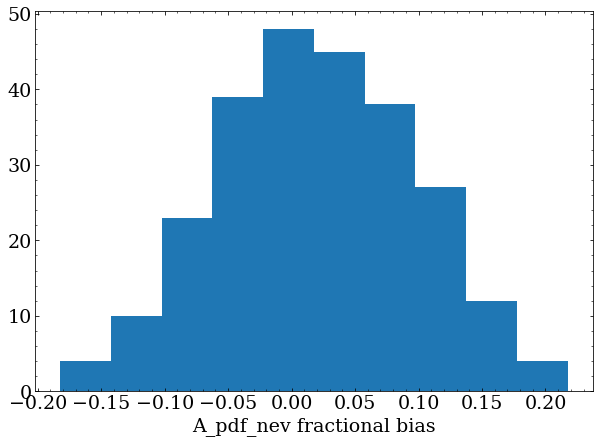

mean -0.0002375888944449569 width 0.10503199727111005


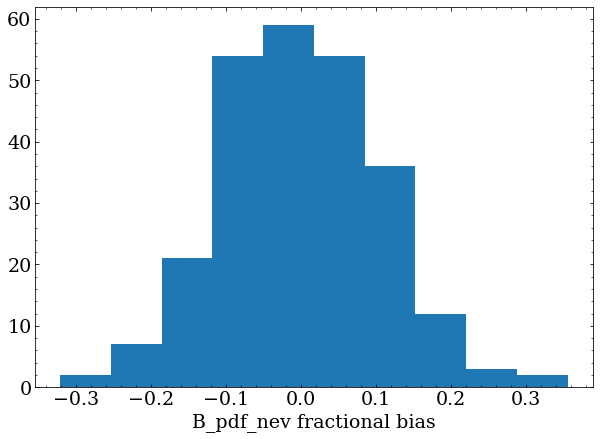

mean -0.004459015664208884 width 0.10273110234089106


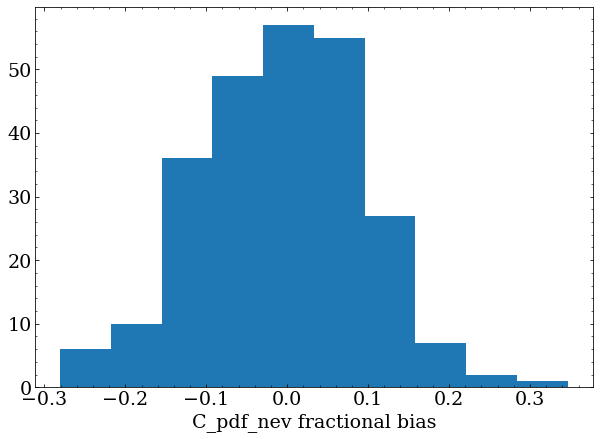

mean -0.06227698197106349 width 0.14447900319566864


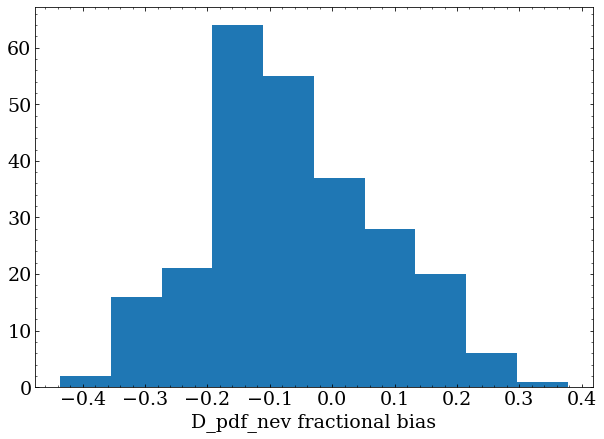

In [20]:
for p,b in zip(params,bias.T):
    print('mean',np.mean(b),'width',np.std(b))
    plt.hist(b)
    plt.xlabel('%s fractional bias'%p)
    plt.show()
    plt.close()

In [21]:
pull = np.asarray([[b/m.lower[p] if (b:=(m.params[p]-c)) < 0 else b/m.upper[p] for p,c in zip(params,central)] for m in minima])

0.19619756275625466 1.0212303934599054


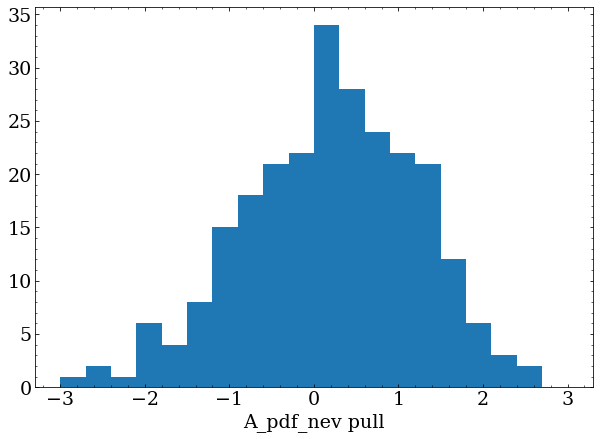

-0.0759813025940232 0.9929882401534211


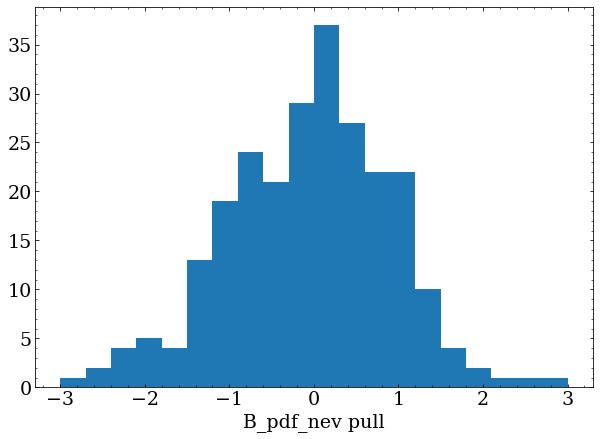

-0.11504532036058082 0.9820906728284268


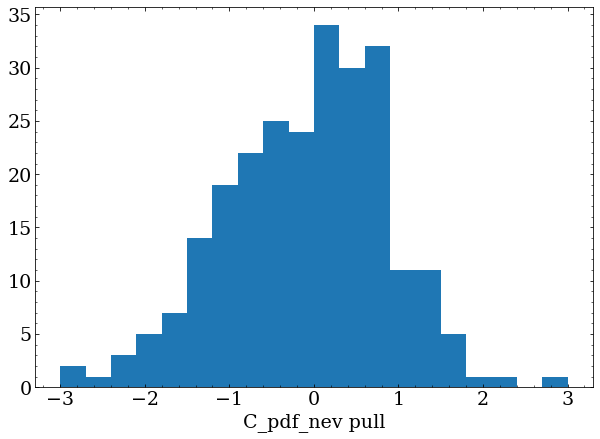

-0.5263991258332258 1.0212273910558771


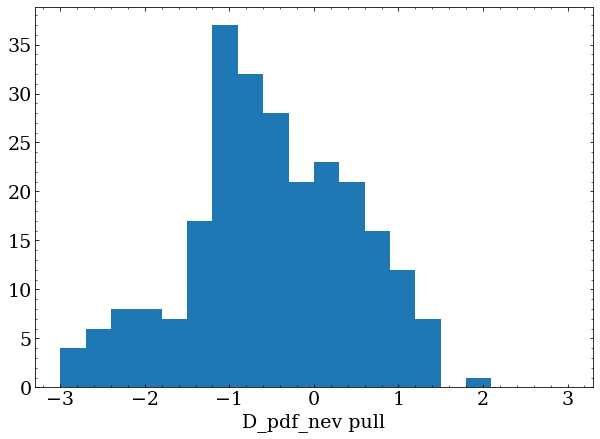

In [22]:
for p,u in zip(params,pull.T):
    print(np.mean(u),np.std(u))
    plt.hist(u,bins=np.linspace(-3,3,21))
    plt.xlabel('%s pull'%p)
    plt.show()
    plt.close()

Text(0, 0.5, 'Pull')

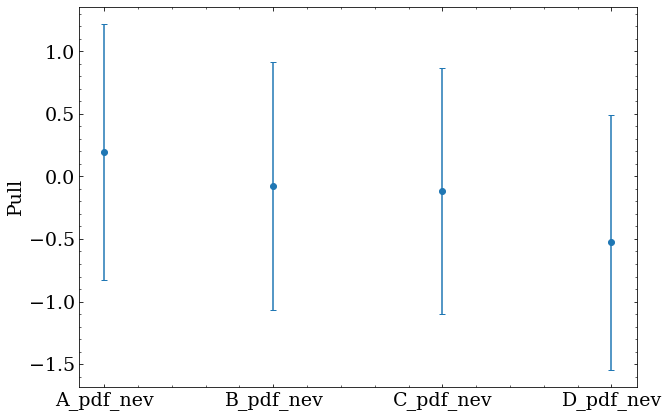

In [23]:
dat = np.asarray([(np.mean(u),np.std(u)) for u in pull.T])
par = np.arange(len(dat))
plt.errorbar(par,dat[:,0],yerr=dat[:,1],linestyle='none',marker='o')
plt.xticks(par,params)
plt.ylabel('Pull')

Text(0, 0.5, 'Bias')

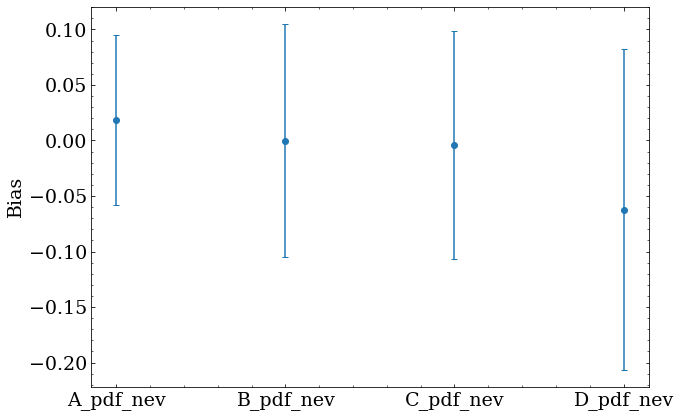

In [24]:
dat = np.asarray([(np.mean(u),np.std(u)) for u in bias.T])
par = np.arange(len(dat))
plt.errorbar(par,dat[:,0],yerr=dat[:,1],linestyle='none',marker='o')
plt.xticks(par,params)
plt.ylabel('Bias')